In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

x = pd.read_csv("./classification_csvs/1994_2021_classification_ready.csv")
circuits_df = pd.read_csv("./raw_csv/circuits.csv")

x = x.fillna(0)

def splitData():
    labels = x["winner"].values
    predictors = x.drop('winner', 1).values

    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(predictors, labels, random_state=1, test_size=0.2)
    return XTrain, XTest, yTrain, yTest

In [3]:
from IPython.display import Image, display
import pydotplus
from scipy import misc


def renderTree(my_tree):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree,
                                 out_file=f,
                                 filled=True,
                                 rounded=True,
                                 special_characters=True)

    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "temp.png"
    graph.write_png(image_name)
    display(Image(filename=image_name))

/var/folders/10/t7y66j2142q2qgg2_4hbsyrh0000gn/T/ipykernel_69435/3821385460.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  predictors = x.drop('winner', 1).values


Accuracy on training data=  1.0
Accuracy on test data=  0.3333333333333333


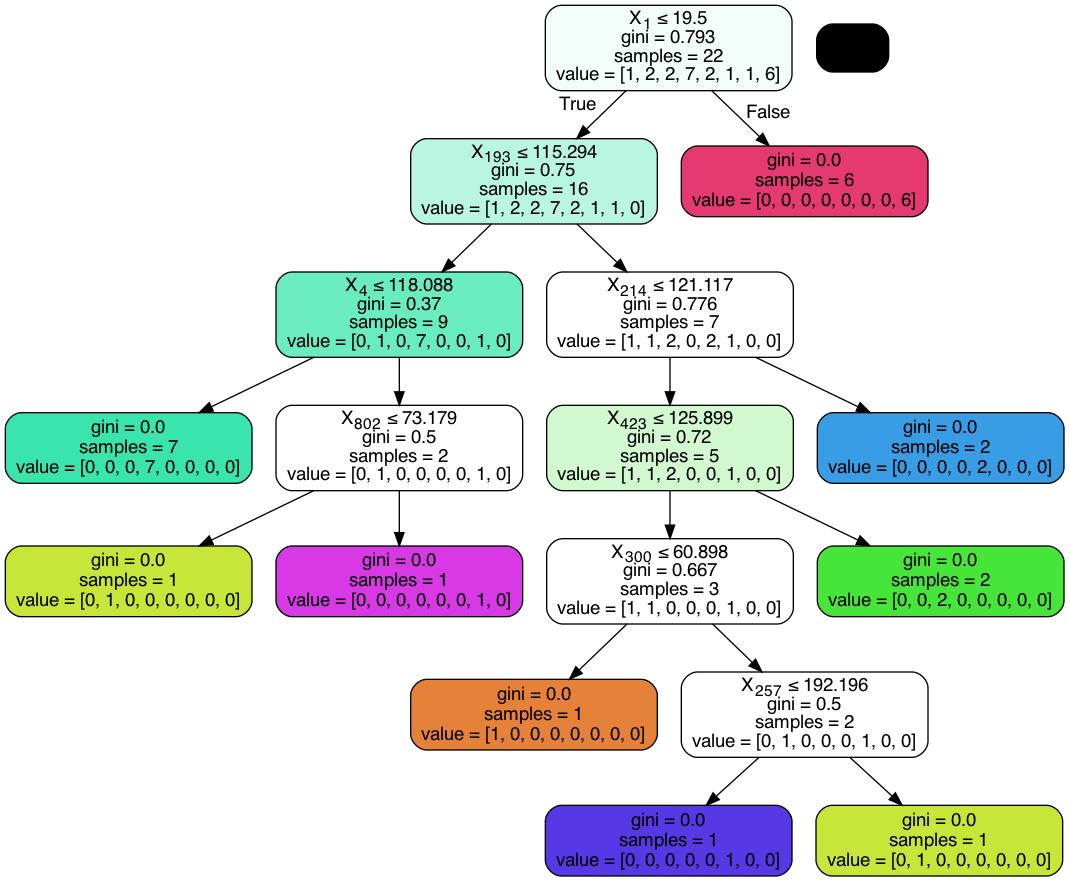

In [6]:
XTrain, XTest, yTrain, yTest = splitData()
decisionTree = tree.DecisionTreeClassifier()
decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
renderTree(decisionTree)

In [7]:
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
import numpy as np

forest =  RandomForestClassifier(bootstrap=True, max_features=2, n_estimators=100, random_state=0)
XTrain, XTest, yTrain, yTest = splitData()

trained_forest = forest.fit(XTrain, yTrain)
importance = trained_forest.feature_importances_

y_pred_train = trained_forest.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = trained_forest.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

/var/folders/10/t7y66j2142q2qgg2_4hbsyrh0000gn/T/ipykernel_69435/3821385460.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  predictors = x.drop('winner', 1).values


Accuracy on training data=  1.0
Accuracy on test data=  0.8333333333333334
